# LINEAR PROGRAMMING WITH PuLP

**1) Sunco processes oil into aviation fuel and heating oil. It costs 40 dollars to purchase each 1000 barrels of oil, which is then distilled and yields 500 barrels of aviation fuel and 500 barrels of heating oil. Output from the distillation may be sold directly or processed in the catalytic cracker. If sold after distillation without further processing, aviation fuel sells for 60 dollars per 1000 barrels, and heating oil sells for 40 dollars per 1000 barrels. It takes 1 hour to process 1000 barrels of aviation fuel in the catalytic cracker, and these 1000 barrels can be sold for 130 dollars. It takes 45 minutes to process 1000 barrels of heating oil in the cracker, and these 1000 barrels can be sold for 90 dollars. Each day, at most 20000 barrels of oil can be purchased, and 8 hours of cracker time are available. Formulate an LP to maximize Sunco’s profits.**

**a) Clearly define decision variables, objective function and constraints.**

In [1]:
# Problem statement of the LP Problem: Maximize the profit of Sunco Oil, subject to relevant constraints.

from pulp import *

prob = LpProblem("Max_Profit_Model", LpMaximize)

Decision Variables of the problem are;

D1 = Amount of Purchased Oil From Sunco Oil (1000 barrels)

D2 = Amount of Produced Aviation Fuel Distilled (1000 barrels)

D3 = Amount of Produced Heating Oil Distilled (1000 barrels)

D4 = Amount of Produced Aviation Fuel With Cracker Process (1000 barrels)

D5 = Amount of Produced Heating Oil With Cracker Process (1000 barrels)

In [2]:
# By using PuLP, decision variables are assigned into the model at the below

D1 = LpVariable("Purchased_Oil", 0)
D2 = LpVariable("Distilled_Avitation_Fuel", 0)
D3 = LpVariable("Distilled_Heating_Oil", 0)
D4 = LpVariable("Processed_Avitation_Fuel", 0)
D5 = LpVariable("Processed_Heating_Oil", 0)

Objective function of the problem is given as follows;

 
Maximize z = 130 * D4 + 90 * D5 + 60 * (D2-D4) + 40 * (D3-D5) - 40 * D1

Subject to these constraints:

Purchased oil cannot exceed 20000 barrels:

D1 <= 20           

Half of the purchased oil has to be aviation fuel:

D2 = 0.5 * D1          

Half of the purchased oil has to be heating oil:

D3 = 0.5 * D1          

Cracker time capacity is 8 hours, and aviation fuel processed in 1 hour, heating oil in 0.75 hours:

D4 + 0.75 * D5 <= 8     

Distilled aviation fuel has to be more than processed one:

D4 <= D2              

Distilled heating oil has to be more than processed one:

D5 <= D3              

Non-negativity constraints:

D1,D3,D4,D5 >= 0      

In [3]:
# Objective function and constraints are added to the model as follows

prob += 130*D4 + 90*D5 + 60*(D2-D4) + 40*(D3-D5) - 40*D1

prob += D1 <= 20,          "Purchased_Oil"
prob += D2 == 0.5*D1,      "Distilled_Avitation_Fuel"
prob += D3 == 0.5*D1,      "Distilled_Heating_Oil"
prob += D4 + 0.75*D5 <= 8, "Cracker_Capacity"
prob += D4 <= D2,          "Processed_Avitation_Fuel"
prob += D5 <= D3,          "Processed_Heating_Oil"

**b) Solve the problem using PULP and report the code and output.**

In [4]:
prob.solve()

1

In [5]:
print("Status:", LpStatus[prob.status])

Status: Optimal


In [6]:
#The problem is solved, and it gives optimal solution. Now, for each decision variables, optimum values are printed by following code blocks:

for i in prob.variables():
    print(i.name, "=", i.varValue)

Distilled_Avitation_Fuel = 10.0
Distilled_Heating_Oil = 10.0
Processed_Avitation_Fuel = 8.0
Processed_Heating_Oil = 0.0
Purchased_Oil = 20.0


In [7]:
#Also, optimum value of the objective function is printed

print("Maximum Profit of Sunco = ", value(prob.objective))

Maximum Profit of Sunco =  760.0


**c) Is it profitable to buy an extra barrel of oil?**

**d) How would Sunco’s profit change if they were able to purchase an extra barrel of oil?**

**e) How would Sunco’s profit change if they were able to have an extra hour of cracker time?**

In [8]:
#For understanding and solving these questions (c,d,e). Conducting sensitivity analysis of the problem is crucial.

import pandas as pd

print("Sensitivity Analysis Report")

Constraint_Sensivity_Analysis = [{'Constraint':name, 'Slack': i.slack, "Shadow_Price":i.pi}
                                for name, i in prob.constraints.items()]

print(pd.DataFrame(Constraint_Sensivity_Analysis))
print("--------------------------------------------------")
Variable_Sensitivity_Analysis = [{'Variable': j.name, 'Value': j.varValue, 'Reduced_Cost': j.dj}
                                for j in prob.variables()]

print(pd.DataFrame(Variable_Sensitivity_Analysis)[['Variable','Value','Reduced_Cost']])

Sensitivity Analysis Report
                 Constraint  Slack  Shadow_Price
0             Purchased_Oil   -0.0          10.0
1  Distilled_Avitation_Fuel   -0.0          60.0
2     Distilled_Heating_Oil   -0.0          40.0
3          Cracker_Capacity   -0.0          70.0
4  Processed_Avitation_Fuel    2.0          -0.0
5     Processed_Heating_Oil   10.0          -0.0
--------------------------------------------------
                   Variable  Value  Reduced_Cost
0  Distilled_Avitation_Fuel   10.0           0.0
1     Distilled_Heating_Oil   10.0           0.0
2  Processed_Avitation_Fuel    8.0           0.0
3     Processed_Heating_Oil    0.0          -2.5
4             Purchased_Oil   20.0           0.0


(c)This table illustrates that one-unit increase in the right-hand side of the "Purchased_Oil" constraint results in a ten-unit increase in the objective function. The sensitivity report indicates that purchasing an additional barrel of oil would be profitable for Sunco. Note that, the sensitivity analysis report displays shadow prices for a quantity of 1000 barrels of oil, suggesting that purchasing an extra 1000 barrels of oil would increase the profit by 10 dollars. However, it is noteworthy that purchasing a single additional barrel of oil only leads to a 0,01-dollar increase.

(d) If Sunco were able to purchase an extra barrel of oil, profit of Sunco is increasing by 0,01 dollar because shadow price of the purchased oil is 10 dollars for purchasing extra 1000 barrels of oil. Although purchasing an extra barrel of oil can be determined as additional profit, this change would be very small in the objective function.

(e) If Sunco were able to have an extra hour of time, their profit would increase by 70 dollars. The shadow price of 'Cracker_Capacity' indicates that one unit increase in cracker capacity results in a 70-unit increase in the objective function, which represents the maximized profit of Sunco.

**2) PM Computers assembles its own brand of personal computers from component parts it purchases overseas and domestically. PM sells most of its computers locally to different departments at State University as well as to individuals and businesses in the immediate geographic region. PM has enough regular production capacity to produce 
160 computers per week. It can produce an additional 50 computers with overtime. The cost of assembling, inspecting, and packaging a computer during regular time is 190 dollars. Overtime production of a computer costs 260 dollars. Furthermore, it costs 10 dollars per computer per week to hold a computer in inventory for future delivery. PM wants to meet all customer orders, with no shortages, to provide quality service. PM’s order schedule for the next 6 weeks is as follows:**

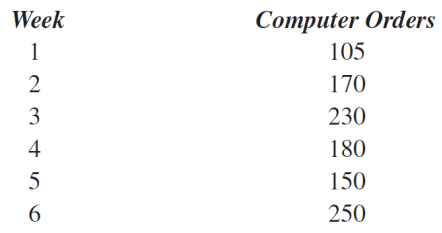

**PM Computers wants to determine a schedule that will indicate how much regular and overtime production it will need each week to meet its orders at the minimum cost. The company wants no inventory left over at the end of the 6-week period.**

**a) Clearly define decision variables, objective function and constraints.**

Objective of the problem can be stated as minimizing the costs of PM Computer.

In the light of that, there are three decision variables which are:

Ri = Number of computer produced during regular time in week i (i = 1,2,3,4,5,6)

Oi = Number of computer produced during overtime time in week i (i = 1,2,3,4,5,6)

Si = Number of computers in stocks for week i (i = 1,2,3,4,5)

Also, we can define weekly computer demand as computer_order(i)

Therefore, the objective function of the study is:

Min Z = 190 * Ri + 260 * Oi + 10 * Si

Subject to these constraints:

Regular production, overtime production and previous week's stock have to meet weekly computer demand:

Ri + Oi + S(i-1) - Si >= computer_order(i)

R1 + O1 - S1 >= 105

S1 - S2 + O2 + R2 >= 170

S2 - S3 + O3 + R3 >= 230

S3 - S4 + O4 + R4 >= 180

S4 - S5 + O5 + R5 >= 150

S5 + O6 + R6 = 250
                               
Regular production allows maximum 160 computers in a week:

Ri <= 160 (i=1,2,3,4,5,6)

Overtime production allows only 50 additional computers to the regular production in a week:

Oi <= 50  (i=1,2,3,4,5,6)    

Non-negativity constraint:

Ri,Oi,Si >= 0

**b) Solve the problem using PULP and report your code and output.**

In [9]:
# Amount of computer orders respect to the weeks (1 to 6) and costs of regular, overtime and inventory are assigned in the lists:

orders = [105, 170, 230, 180, 150, 250]
costs = [190, 260, 10]

# Initialize the problem as minimization:

problem = LpProblem("Cost_Minimization", LpMinimize)

# Decision Variables are added to the problem via using LpVariable.dicts:

weeks = 6
regular_max = 160
overtime_max = 50

R = LpVariable.dicts("Regular", [i for i in range(1, weeks + 1)], 0)
O = LpVariable.dicts("Overtime", [i for i in range(1, weeks + 1)], 0)
S = LpVariable.dicts("Stock", [i for i in range(1, weeks)], 0)

# Objective function is created:

problem += lpSum([costs[0] * lpSum(R) + costs[1] * lpSum(O) + costs[2] * lpSum(S)])

# There are 3 conditions for R,O and S variables respect to the problem, so constraints are added by using if loop:

for i in range(1, weeks+1):
    if i == 1:
        problem += R[i] + O[i] - S[i] >= orders[i - 1], "Week_%s" %i
    elif i < 6:
        problem += R[i] + O[i] + S[i - 1] - S[i] >= orders[i - 1], "Week_%s" %i
    else:
        problem += R[i] + O[i] + S[i - 1] == orders[i - 1], "Week_%s" %i
        

# Constraints for capacity of Regular and Overtime production are assigned:

for i in range(1, weeks + 1):
    problem += R[i] <= regular_max, "Regular_%s" %i
    problem += O[i] <= overtime_max, "Overtime_%s" %i


In [10]:
problem.solve()

1

In [11]:
print("Status:", LpStatus[problem.status])

Status: Optimal


In [13]:
# Optimum values for minimum cost of PM are printed:

for j in problem.variables():
    print(j.name, "=", j.varValue)

Overtime_1 = 0.0
Overtime_2 = 0.0
Overtime_3 = 25.0
Overtime_4 = 20.0
Overtime_5 = 30.0
Overtime_6 = 50.0
Regular_1 = 160.0
Regular_2 = 160.0
Regular_3 = 160.0
Regular_4 = 160.0
Regular_5 = 160.0
Regular_6 = 160.0
Stock_1 = 55.0
Stock_2 = 45.0
Stock_3 = 0.0
Stock_4 = 0.0
Stock_5 = 40.0


In [14]:
print("Minimum Cost of PM = ", value(problem.objective))

Minimum Cost of PM =  216300.0


**c) If you had a chance to expand the regular production capacity, which week 
would you choose to decrease the cost most?**

In [15]:
# For answering this question, sensivity analysis report should be analyzed, so:

print("Sensitivity Analysis Report")

Constraint_Sensivity_Analysis = [{'Constraint':name, 'Slack': i.slack, "Shadow_Price":i.pi}
                                for name, i in problem.constraints.items()]

print(pd.DataFrame(Constraint_Sensivity_Analysis))
print("--------------------------------------------------")
Variable_Sensitivity_Analysis = [{'Variable': j.name, 'Value': j.varValue, 'Reduced_Cost': j.dj}
                                for j in problem.variables()]

print(pd.DataFrame(Variable_Sensitivity_Analysis)[['Variable','Value','Reduced_Cost']])

Sensitivity Analysis Report
    Constraint  Slack  Shadow_Price
0       Week_1   -0.0         240.0
1       Week_2   -0.0         250.0
2       Week_3   -0.0         260.0
3       Week_4   -0.0         260.0
4       Week_5   -0.0         260.0
5       Week_6   -0.0         270.0
6    Regular_1   -0.0         -50.0
7   Overtime_1   50.0           0.0
8    Regular_2   -0.0         -60.0
9   Overtime_2   50.0           0.0
10   Regular_3   -0.0         -70.0
11  Overtime_3   25.0           0.0
12   Regular_4   -0.0         -70.0
13  Overtime_4   30.0           0.0
14   Regular_5   -0.0         -70.0
15  Overtime_5   20.0           0.0
16   Regular_6   -0.0         -80.0
17  Overtime_6   -0.0         -10.0
--------------------------------------------------
      Variable  Value  Reduced_Cost
0   Overtime_1    0.0          20.0
1   Overtime_2    0.0          10.0
2   Overtime_3   25.0           0.0
3   Overtime_4   20.0           0.0
4   Overtime_5   30.0           0.0
5   Overtime_6   50.0

(c) If we can expand the regular production capacity in a week, Week 6 is the best choice for reducing costs. As shown in the sensitivity analysis report, the shadow price of 'Regular_6', which indicates Week 6 regular production, is 80 dollars. This implies that a 1-unit increase in regular production capacity in week 6 leads to an 80 dollars decrease in the production cost of the PM computers.

**3) A jewelry store makes necklaces and bracelets from gold and platinum. The store has 18 ounces of gold and 20 ounces of platinum. Each necklace requires 3 ounces of gold and 2 ounces of platinum, whereas each bracelet requires 2 ounces of gold and 4 ounces of platinum. The demand for bracelets is no more than four. A necklace earns 300 dollars in profit and a bracelet, 400 dollars. The store wants to determine the number of necklaces and bracelets to make in order to maximize profit.**

**a) Formulate a linear programming model for this problem.**

Objective of the problem can be stated as maximizing the profit of the jewelry store.

Thus, there are four decision variables which are:

X1 = Amount of Produced Necklace

X2 = Amount of Produced Bracelet

By using decision variables, the objective function of the study is determined:

Max Z = 300 * X1 + 400 * X2

Subject to these constraints:

The store has 18 ounces of gold and 20 ounces of platinum:

3 * X1 + 2 * X2 <= 18

2 * X1 + 4 * X2 <= 20

Demand of bracelet does not exceed 4:

X2 <= 4

Non-negativity constraint:

X1, X2 >= 0

In [16]:
# By using PuLP, decision variables are added into the model at the below:

X1 = LpVariable("Number_of_Necklace", 0)
X2 = LpVariable("Number_of_Bracelet", 0)

In [17]:
# Objective function and constraints are assigned to the LP:

problm = LpProblem("Profit_Maximization", LpMaximize)

problm += 300*X1 + 400*X2

problm += 3*X1 + 2*X2 <= 18, "Gold_Capacity"
problm += 2*X1 + 4*X2 <= 20, "Platinum_Capacity"
problm += X2 <= 4, "Bracelet_Demand"

In [18]:
problm.solve()

1

In [19]:
print("Status:", LpStatus[problm.status])

Status: Optimal


In [20]:
# Optimum values for decision variables:

for j in problm.variables():
    print(j.name, "=", j.varValue)

Number_of_Bracelet = 3.0
Number_of_Necklace = 4.0


In [21]:
print("Maximum Profit of the Jewelry Store = ", value(problm.objective))

Maximum Profit of the Jewelry Store =  2400.0


In [22]:
print("Sensitivity Analysis Report")

Constraint_Sensivity_Analysis = [{'Constraint':name, 'Slack': i.slack, "Shadow_Price":i.pi}
                                for name, i in problm.constraints.items()]

print(pd.DataFrame(Constraint_Sensivity_Analysis))
print("--------------------------------------------------")
Variable_Sensitivity_Analysis = [{'Variable': j.name, 'Value': j.varValue, 'Reduced_Cost': j.dj}
                                for j in problm.variables()]

print(pd.DataFrame(Variable_Sensitivity_Analysis)[['Variable','Value','Reduced_Cost']])

Sensitivity Analysis Report
          Constraint  Slack  Shadow_Price
0      Gold_Capacity   -0.0          50.0
1  Platinum_Capacity   -0.0          75.0
2    Bracelet_Demand    1.0          -0.0
--------------------------------------------------
             Variable  Value  Reduced_Cost
0  Number_of_Bracelet    3.0  5.684342e-14
1  Number_of_Necklace    4.0  0.000000e+00


(a) For maximizing profit, producing 3 bracelets and 4 necklaces is the optimum solution for this problem

**b) Solve this model by using graphical analysis. Determine the range of profit per necklace that leaves the current solution optimal using graphical analysis**

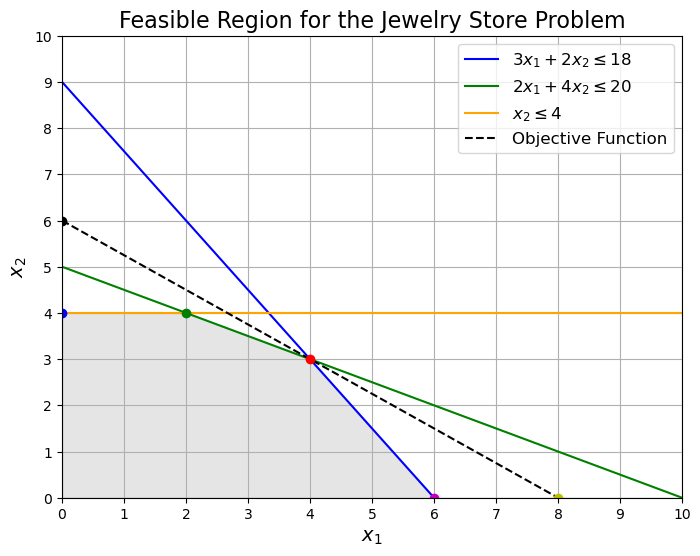

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Constraints are defined as lines:
x = np.linspace(0, 10, 400)

# Constraint 1: 3x1 + 2x2 <= 18
y1 = (18 - 3 * x) / 2

# Constraint 2: 2x1 + 4x2 <= 20
y2 = (20 - 2 * x) / 4

# Constraint 3: x2 <= 4
y3 = 4 - 0 * x

# Objective function line: 300*x1 + 400*x2
objective = (- 3 * x) / 4

# Line passing through points (0,6) and (8,0)
x_additional = np.array([0, 8])
y_additional = 6 - (3/4) * x_additional

# Plot is made with these lines: 
plt.figure(figsize=(8,6))
plt.plot(x, y1, label=r'$3x_1 + 2x_2 \leq 18$', color='blue')
plt.plot(x, y2, label=r'$2x_1 + 4x_2 \leq 20$', color='green')
plt.plot(x, y3, label=r'$x_2 \leq 4$', color='orange')
plt.plot(x_additional, y_additional, label='Objective Function', color='black', linestyle='dashed')

# Calculate intersection points:
A = np.array([[3, 2], [2, 4]])
B = np.array([18, 20])
intersection = np.linalg.solve(A, B)

# Plot intersection and corner points:
plt.plot(intersection[0], intersection[1], 'ro')

# Plot the point (2,4):
plt.plot(2, 4, 'go')

# Plot the point (0,4):
plt.plot(0, 4, 'bo')

# Plot the point (6,0):
plt.plot(6, 0, 'mo')

# Plot the points (0,6) and (8,0):
plt.plot(0, 6, 'ko')
plt.plot(8, 0, 'yo')

# Feasible region is filled:
plt.fill_between(x, np.minimum(np.minimum(y2, y3), np.minimum(y2, y1)), 0, alpha=0.2, color='grey')

plt.xlim((0, 10))
plt.ylim((0, 10))
plt.xlabel(r'$x_1$', fontsize=14)
plt.ylabel(r'$x_2$', fontsize=14)
plt.title('Feasible Region for the Jewelry Store Problem', fontsize=16)
plt.legend(fontsize=12)
plt.grid()

# Adjust x and y ticks:
plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0, 11, 1))

plt.show()


(b) According to the graph, extreme points of the feasible region are (0,4), (2,4), (4,3), (6,0). There can said that one of these points gives optimum solution of the problem, so:

(X1, X2) = (0,4) - Blue point

300 * 0 + 400 * 4 = 1600 dollars

(X1, X2) = (2,4) - Green point

300 * 2 + 400 * 4 = 2200 dollars

(X1, X2) = (4,3) - Red point

300 * 4 + 400 * 3 = 2400 dollars

(X1, X2) = (6,0) - Purple point

300 * 6 + 400 * 0 = 1800 dollars

As understood that, red point (4, 3) gives maximum profit of the problem with 2400 dollars. Therefore, optimum solution should be 300 * X1 + 400 * X2 = 2400. 

To determine the range of profit per necklace that leaves the current solution optimal using graphical analysis, it is important to observe the current solution on the graph and the corresponding profit value. Then, there should be examined the variations on the graph that do not alter the current solution (2400 dollars), thereby determining the range within which changes in the profit per necklace do not affect the current solution. This analysis helps identify the intervals in which changes in the profit per necklace have an impact on the solution.

Slope of blue line (3 * X1 + 2 * X2 <= 18) is m = -3/2

Slope of green line (2 * X1 + 4 * X2 <= 20) is m = -1/2

Slope of objective function's line (300 * X1 + 400 * X2 = 2400) is m = -3/4

Let's say N * X1 + 400 * X2 = 2400, and m = -N/400 for finding range of profit per necklace that leaves the current solution optimal.

There can be said that, the optimum solution would be same between -3/2 and -1/2. So there can be explained with this equation:

1/2 < N/400 < 3/2, and multiply by 4:

200 < N < 600

According to this equation, it can be stated that a profit range of 200 to 600 dollars per necklace does not alter the optimal solution of the problem.